In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set the random seed for reproducibility
np.random.seed(1)

# Define the number of rows and columns
num_rows = 100

num_columns = 2

# Create a DataFrame with random data
random_data = pd.DataFrame(np.random.rand(num_rows, num_columns), 
                            columns=[f'Column_{i+1}' for i in range(num_columns)])

print(random_data)

rd = random_data

Column1 = 'Column_1'
Column2 = 'Column_2'

rd[Column1] = (rd[Column1] + rd.index) * np.sin(rd[Column1]) + rd.index
rd[Column2] = (rd[Column2] + rd.index) * np.cos(rd[Column2]) + rd.index

print(rd)

   Column_1  Column_2
0  0.417022  0.720324
1  0.000114  0.302333
2  0.146756  0.092339
3  0.186260  0.345561
4  0.396767  0.538817
5  0.419195  0.685220
6  0.204452  0.878117
7  0.027388  0.670468
8  0.417305  0.558690
9  0.140387  0.198101
    Column_1   Column_2
0   0.168910   0.541390
1   1.000114   2.243265
2   2.313919   4.083425
3   3.590048   6.147790
4   5.699082   7.895741
5   7.205747   9.401953
6   7.259695  10.392373
7   7.192439  13.010051
8  11.411517  15.257344
9  10.278980  18.018205


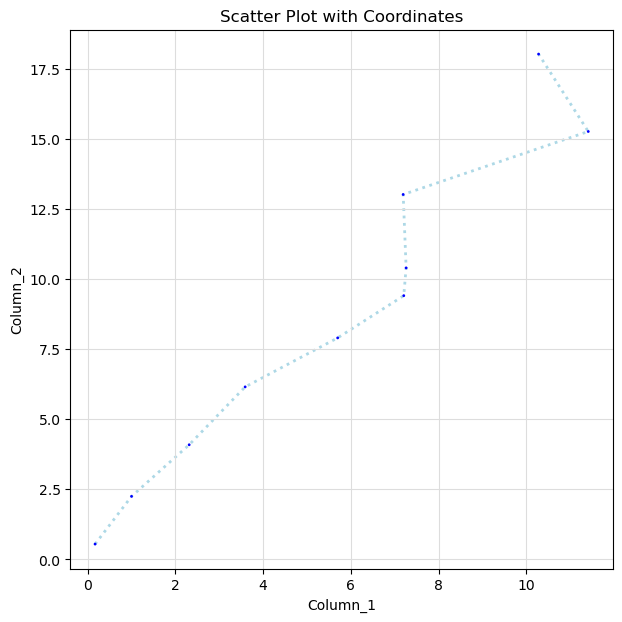

In [39]:
def create_original_graph(dataset):

    color = 'blue'
    linecolor = "lightblue"
    plt.figure(figsize=(7, 7))
    
    plt.plot(dataset[Column1], dataset[Column2], color=linecolor, linestyle=':', linewidth=2, label='Trend Line', zorder=1)
    
    plt.scatter(dataset[Column1], dataset[Column2], s=1, zorder=3, facecolors='none', edgecolors=color)

    plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
    plt.grid(which='minor', color='#EEEEEE', linestyle='-', linewidth=0.5)
    
    plt.xlabel(Column1)
    plt.ylabel(Column2)
    plt.title('Scatter Plot with Coordinates')


create_original_graph(rd)
plt.show()

In [40]:
def find_sample_means(samples, dataset):
    n = samples
    
    x_sample_sum = 0
    y_sample_sum = 0
    
    for row in range(n):
        y_sample_sum += dataset[Column2][row]
        x_sample_sum += dataset[Column1][row]
    
    y_sample_mean = y_sample_sum / n
    x_sample_mean = x_sample_sum / n
    
    return x_sample_mean, y_sample_mean

sample_means = find_sample_means(num_rows, rd)
x_sample_mean, y_sample_mean = sample_means
print(f"X samples Mean: {x_sample_mean} \nY samples Mean: {y_sample_mean}")

X samples Mean: 5.612045257785139 
Y samples Mean: 8.699153569159778


In [41]:
def find_slope(x_mean, y_mean, samples, dataset):
    n = samples
    covariance = 0
    variance = 0

    for row in range(n):
        
        xi = dataset[Column1][row]
        yi = dataset[Column2][row]
        
        covariance += (xi - x_mean) * (yi - y_mean)
        
        variance += (xi - x_mean) ** 2

    B1 = covariance / variance

    return B1

B1 = find_slope(x_sample_mean, y_sample_mean, num_rows, rd)

print(f"'B1', or the Slope: {B1}")

'B1', or the Slope: 1.4471606841169942


In [42]:
def find_intercept(x_mean, y_mean, slope):
    
    B0 = y_mean - (slope * x_mean)

    return B0

B0_rss_method = find_intercept(x_sample_mean, y_sample_mean, B1)

print(f"'B0', or the Y-Intercept: {B0_rss_method}")

'B0', or the Y-Intercept: 0.5776223146079023


In [43]:
def find_intercept_gradient_descent(slope, samples, dataset):
    B1 = slope
    n = samples
    
    new_intercept = 0
    learning_rate = 0.00001
    rss_derivative_sum = 0
    min_step_size = 0.00000001
    step_size = 1
    intercept_list = []
    rss_list = []
    max_iteration = 1000000000000000
    iteration = 0
    
    while (np.abs(step_size) > min_step_size) and (iteration <= max_iteration):
        rss_derivative_sum = 0
        for row in range(n):
            xi = dataset[Column1][row]
            yi = dataset[Column2][row]
            
            new_rss_derivative = -2 * (yi - (new_intercept + (slope * xi)))
            rss_derivative_sum += new_rss_derivative

        iteration += 1
        rss_list.append(rss_derivative_sum)
        intercept_list.append(new_intercept)
        step_size = rss_derivative_sum * learning_rate
        new_intercept = new_intercept - step_size
    
        
    abs_rss_list = [abs(value) for value in rss_list]
    min_rss = min(abs_rss_list)
    min_rss_index = abs_rss_list.index(min_rss)
    optimal_intercept = [intercept_list[min_rss_index], min_rss_index]
    
    return optimal_intercept, rss_list, abs_rss_list, intercept_list
    
optimal_intercept, rss_list, abs_rss_list, intercept_list = find_intercept_gradient_descent(B1, num_rows, rd)
B0 = optimal_intercept[0]
print(f"Optimal intercept: {optimal_intercept[0]}, found at iteration: {optimal_intercept[1]}")
print(B0, rss_list, intercept_list)

Optimal intercept: 0.577572318758281, found at iteration: 46769
0.577572318758281 [-11.552446292158029, -11.550135802899597, -11.547825775739021, -11.545516210583871, -11.54320710734175, -11.540898465920282, -11.538590286227098, -11.536282568169856, -11.533975311656222, -11.53166851659388, -11.52936218289058, -11.52705631045399, -11.524750899191904, -11.52244594901207, -11.520141459822263, -11.5178374315303, -11.515533864043991, -11.513230757271181, -11.510928111119737, -11.508625925497512, -11.50632420031241, -11.504022935472333, -11.501722130885256, -11.49942178645907, -11.497121902101783, -11.49482247772136, -11.49252351322582, -11.49022500852317, -11.487926963521474, -11.485629378128756, -11.483332252253136, -11.48103558580269, -11.478739378685521, -11.476443630809795, -11.474148342083618, -11.471853512415201, -11.469559141712734, -11.46726522988439, -11.464971776838404, -11.462678782483042, -11.460386246726538, -11.458094169477196, -11.455802550643302, -11.453511390133166, -11.451

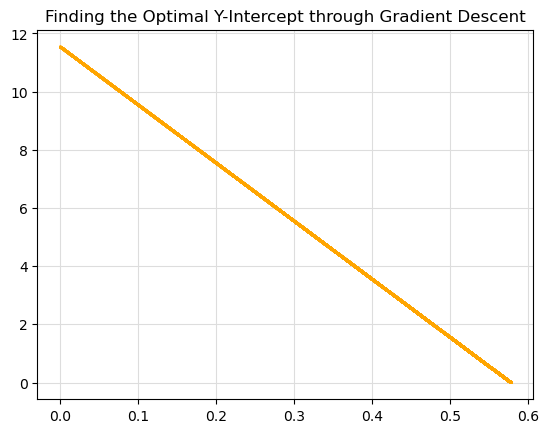

In [44]:
plt.scatter(intercept_list, abs_rss_list, s=1, zorder=3, color='orange')

plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
plt.grid(which='minor', color='#EEEEEE', linestyle='-', linewidth=0.5)
plt.title('Finding the Optimal Y-Intercept through Gradient Descent')

plt.show()

In [45]:
def find_residual_sum_of_squares(intercept, slope, samples, dataset):
    
    RSS = 0
    squared_errors = []
    
    for row in range(samples):
        
        xi = dataset[Column1][row]
        yi = dataset[Column2][row]
        
        squared_error = (yi - (intercept+(slope*xi))) ** 2

        RSS += squared_error
        squared_errors.append(squared_error)
        MSE = RSS / samples
    return RSS, MSE, squared_errors

RSS_result = find_residual_sum_of_squares(B0, B1, num_rows, rd)
RSS, MSE, squared_errors = RSS_result

print(f"Residiual Sum of Squares: {RSS} \n\nMSE: {MSE} \n\nList of Squared Errors: {squared_errors}")

Residiual Sum of Squares: 18.246430045521816 

MSE: 1.8246430045521815 

List of Squared Errors: [0.07874918002632601, 0.047683786930150594, 0.02472421206139412, 0.14050626254283785, 0.8636339169629452, 2.571190189887484, 0.4776817803283901, 4.09602380195524, 3.3654899357920627, 6.580746979034983]


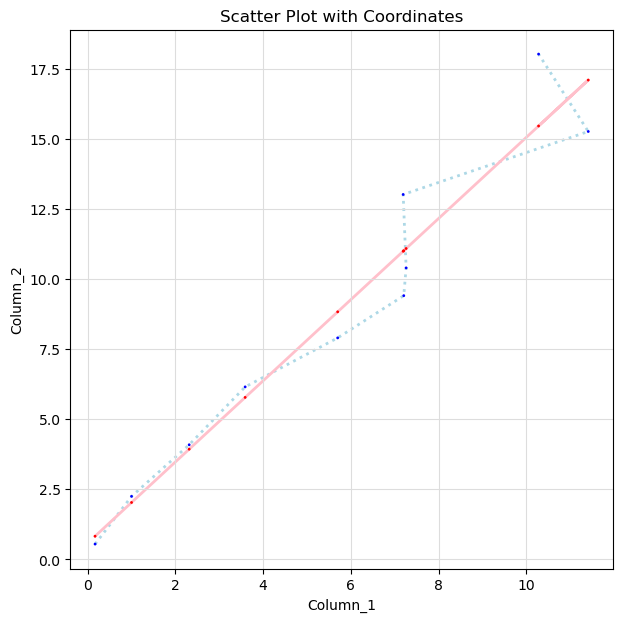

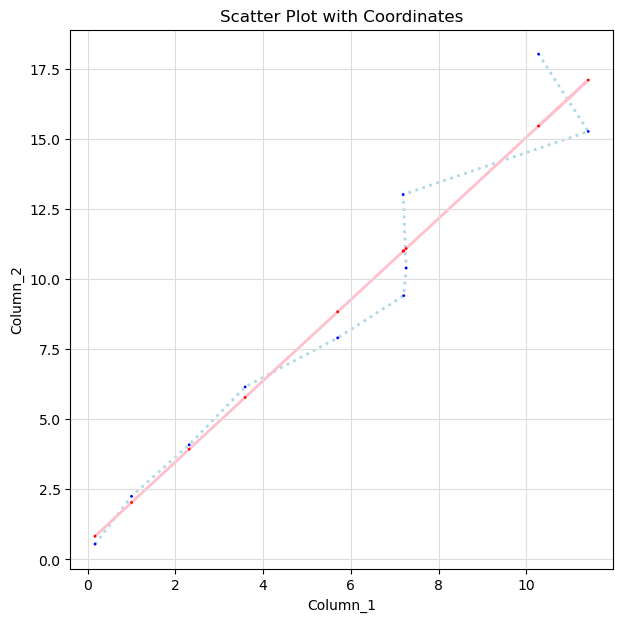

In [46]:
create_original_graph(rd)

LR_color = 'red'
LR_linecolor = 'pink'

def create_linear_regression_lines(intercept, slope, dataset):
    x_linear_regression = dataset[Column1]
    y_linear_regression = intercept + (slope * x_linear_regression)
    plt.plot(x_linear_regression, y_linear_regression, color=LR_linecolor, linestyle='-', linewidth=2, label='Trend Line', zorder=1)
    plt.scatter(x_linear_regression, y_linear_regression, s=1, zorder=3, facecolors='none', edgecolors=LR_color, label='Regression Line')

    return x_linear_regression, y_linear_regression

x_linear_regression, y_linear_regression = create_linear_regression_lines(B0, B1, rd)

plt.show()

create_original_graph(rd)
x_linear_regression, y_linear_regression = create_linear_regression_lines(B0_rss_method, B1, rd)
plt.show()

In [47]:
def predict_next_point(intercept, slope, samples, columns, dataset):
    
    new_num_rows = samples + 1

    # Creating a new data frame with the same seed
    new_rd = pd.DataFrame(np.random.rand(new_num_rows, columns), 
                            columns=[f'Column_{i+1}' for i in range(columns)])

    new_rd[Column1] = (new_rd[Column1] + new_rd.index)
    new_rd[Column2] = (new_rd[Column2] + new_rd.index)

    
    true_Y = round(new_rd.at[len(new_rd) - 1, Column2], 4)

    test_X = round(new_rd.at[len(new_rd) - 1, Column1], 4)
    
    test_Y = round(intercept + slope * test_X, 4)

    residual = round(true_Y - test_Y, 4)
    
    return test_Y, true_Y, test_X, residual


    
test_Y, true_Y, test_X, residual = predict_next_point(B0, B1, num_rows, num_columns, rd)
print(f"At X = {test_X}, the True Y-Value is: {true_Y} \n\nAt X = {test_X}, the Predicted Y-Value is: {test_Y} \n\nAt X = {test_X} the Residual is {residual}")

At X = 10.9889, the True Y-Value is: 10.7482 

At X = 10.9889, the Predicted Y-Value is: 16.4803 

At X = 10.9889 the Residual is -5.7321


In [48]:
def find_sample_SD(x_mean, samples, dataset):
    temp = 0
    for row in range(samples):
        xi = row
        temp += (xi - x_mean) ** 2
    standard_deviation = np.sqrt(temp / (samples-1))
    return standard_deviation
s_standard_deviation = find_sample_SD(x_sample_mean, num_rows, rd)
print(f"The samples Standard Deviation is: {round(s_standard_deviation, 4)}")

The samples Standard Deviation is: 3.2466


In [49]:
def find_sample_SE(sd, samples):
    standard_error = (sd ** 2) / samples
    return standard_error
s_standard_error = find_sample_SE(s_standard_deviation, num_rows)
print(f"The Standard Error is: {round(s_standard_error, 4)}")

The Standard Error is: 1.0541


In [50]:
def find_RSE(samples):
    RSE = np.sqrt(RSS / (samples-2))
    return RSE
RSE = find_RSE(num_rows)
print(f"The Residual Standard Error is: {round(RSE, 4)}")

The Residual Standard Error is: 1.5102


In [51]:
def find_SE_of_slope_and_intercept(x_mean, samples, dataset):
    SE_B0_Sq = 0
    SE_B1_Sq = 0
    
    temp1 = 0
    for row in range(samples):
        temp1 += (dataset[Column1][row] - x_mean) ** 2

    temp2 = (1 / samples) + (x_mean / temp1)
    
    SE_B0_Sq = RSE * temp2
    SE_B1_Sq = RSE / temp1

    return SE_B0_Sq, SE_B1_Sq

SE_B0_Sq, SE_B1_Sq = find_SE_of_slope_and_intercept(x_sample_mean, num_rows, rd)

print(f"The Standard Error of B0 Squared is: {round(SE_B0_Sq, 4)}\nThe Standard error of B1 Squared is: {round(SE_B1_Sq, 4)}")

The Standard Error of B0 Squared is: 0.2167
The Standard error of B1 Squared is: 0.0117


In [52]:
def find_confidence_intervals(intercept, slope, SE_intercept, SE_slope):
    CI_95_B0 = []
    CI_95_B1 = []

    lower_Limit = -2
    upper_Limit = 2

    CI_95_B0.append(round(intercept + (lower_Limit * SE_intercept), 4))
    CI_95_B0.append(round(intercept + (upper_Limit * SE_intercept), 4))
    CI_95_B1.append(round(slope + (lower_Limit * SE_slope), 4))
    CI_95_B1.append(round(slope + (upper_Limit * SE_slope), 4))

    confidence_intervals = [CI_95_B0, CI_95_B1]
    return confidence_intervals
confidence_Intervals = find_confidence_intervals(B0, B1, SE_B0_Sq, SE_B1_Sq)
print(confidence_Intervals)
print(f"\nAt a 95% Confidence Interval, the Y-Intercept lies in the range: {confidence_Intervals[0]}")
print(f"\nAt a 95% Confidence Interval, the Slope lies in the range: {confidence_Intervals[1]}")

[[0.1442, 1.011], [1.4238, 1.4706]]

At a 95% Confidence Interval, the Y-Intercept lies in the range: [0.1442, 1.011]

At a 95% Confidence Interval, the Slope lies in the range: [1.4238, 1.4706]


In [53]:
def find_t_stat(slope, SE_slope_sq):
    SE_slope = np.sqrt(SE_slope_sq)
    t_stat = slope / SE_slope
    return t_stat

t_stat = round(find_t_stat(B1, SE_B1_Sq), 4)
print(f"The t-statistic is {t_stat}")

The t-statistic is 13.3768


In [54]:
def find_total_sum_of_squares(y_mean, samples, dataset):
    TSS = 0
    for row in range(samples):
        TSS += (dataset[Column2][row] - y_mean) ** 2
    return TSS
TSS = round(find_total_sum_of_squares(y_sample_mean, num_rows, rd), 4)
print(f"The Total Sum of Squares is {TSS}")

def find_r_squared(tss, rss):
    R2 = (tss - rss) / tss
    return R2
R2 = round(find_r_squared(TSS, RSS), 4)
print(f"The R-Squared Value is {R2}")

The Total Sum of Squares is 288.4868
The R-Squared Value is 0.9368


In [55]:
def calculate_p_value(t_statistic, df, two_tailed=True):
    if two_tailed:
        p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df))
    else:
        p_value = 1 - stats.t.cdf(t_statistic, df)
    return p_value
    
df = num_rows-2
p_value = calculate_p_value(t_stat, df)
print(f"P-value: {p_value}")

P-value: 9.332400059403057e-07
